In [2]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# to plot rantangular patch for different objects in the image
import matplotlib.patches as patches

In [3]:
# set random state
seed = 42
rng = np.random.RandomState(seed)

In [4]:
data = pd.read_csv('E:/computer_vision/Handouts _vidhya_analytics/CV_101-master/datasets/blood_cell_detection/blood_cell_detection.csv')
data.head(5)

,filename,cell_type,xmin,xmax,ymin,ymax
0,0.jpg,RBC,5,90,249,354
1,0.jpg,RBC,210,323,8,118
2,0.jpg,RBC,158,256,283,394
3,0.jpg,RBC,83,166,399,480
4,0.jpg,RBC,534,635,13,116


In [5]:
data.shape

(4888, 6)

In [6]:
# to print total no. of images in dataset
data.filename.unique().shape
# to print different category of objects in an image
data.cell_type.unique()
# to print no. of objects of each category
data.cell_type.value_counts()

RBC          4155
WBC           372
Platelets     361
Name: cell_type, dtype: int64

Image is of shape (480, 640, 3)


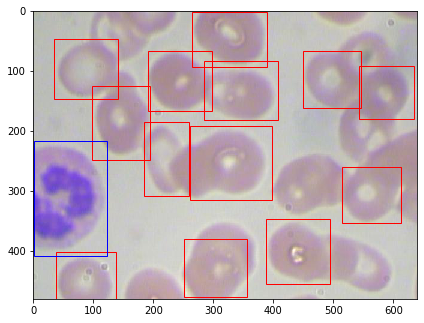

In [11]:
# take random index
idx = rng.choice(range(data.shape[0]))

# get corresponding image
image = plt.imread('C:/Users/shash/Desktop/machine learning practice/blood_cell_detection/images/' + data.iloc[idx].filename.split('.')[0] + '.jpg')

# draw empty figure
fig = plt.figure()

# define axis
ax = fig.add_axes([0,0,1,1])

# plot the image
plt.imshow(image)

# iterate over data
for _, row in data[data.filename == data.iloc[idx].filename].iterrows():
    # get actual coordinates
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    # find height and width of the patch
    width = xmax - xmin
    height = ymax - ymin
    
    # set different bounding box colors
    if row.cell_type == 'RBC':
        edgecolor = 'r'
    elif row.cell_type == 'WBC':
        edgecolor = 'b'
    elif row.cell_type == 'Platelets':
        edgecolor = 'g'
    
    # create rectangular patch
    rect = patches.Rectangle((xmin, ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    # add rectangular patch
    ax.add_patch(rect)
    
# print image shape
print("Image is of shape", image.shape)

# show image with patches
plt.show()

In [12]:
# keeping only those images which are having WBC's
data = data.loc[data.cell_type == 'WBC'].copy()

# drop images having more than one WBC
data = data.drop_duplicates(subset = ['filename', 'cell_type'], keep = False)

Image is of shape (480, 640, 3)


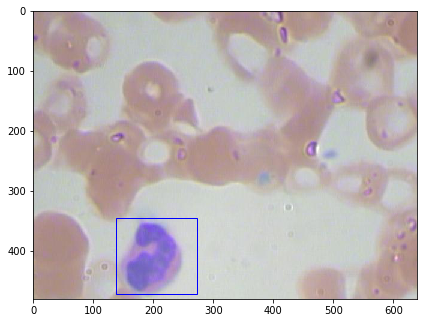

In [15]:
# take random index
idx = rng.choice(range(data.shape[0]))

# get corresponding image
image = plt.imread('C:/Users/shash/Desktop/machine learning practice/blood_cell_detection/images/' + data.iloc[idx].filename.split('.')[0] + '.jpg')

# draw empty figure
fig = plt.figure()

# define axis
ax = fig.add_axes([0,0,1,1])

# plot the image
plt.imshow(image)

# iterate over data
for _, row in data[data.filename == data.iloc[idx].filename].iterrows():
    # get actual coordinates
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    # find height and width of the patch
    width = xmax - xmin
    height = ymax - ymin
    
    # set different bounding box colors
    if row.cell_type == 'RBC':
        edgecolor = 'r'
    elif row.cell_type == 'WBC':
        edgecolor = 'b'
    elif row.cell_type == 'Platelets':
        edgecolor = 'g'
    
    # create rectangular patch
    rect = patches.Rectangle((xmin, ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    # add rectangular patch
    ax.add_patch(rect)
    
# print image shape
print("Image is of shape", image.shape)

# show image with patches
plt.show()

In [16]:
row = data.iloc[idx]
row

filename     161.jpg
cell_type        WBC
xmin             137
xmax             272
ymin             344
ymax             471
Name: 2107, dtype: object

In [17]:
# we need to convert shape to 224, 224, 3 as we have to run a pre-trained model on it
from skimage.transform import resize

In [18]:
# create empty list
X = []
Y = []

# divide image into 5 patches
patch_1_xmin, patch_1_ymin, patch_1_xmax, patch_1_ymax = 0, 0, 320, 240
patch_2_xmin, patch_2_ymin, patch_2_xmax, patch_2_ymax = 320, 0, 640, 240
patch_3_xmin, patch_3_ymin, patch_3_xmax, patch_3_ymax = 0, 240, 320, 480
patch_4_xmin, patch_4_ymin, patch_4_xmax, patch_4_ymax = 320, 240, 640, 480
patch_5_xmin, patch_5_ymin, patch_5_xmax, patch_5_ymax = 160, 120, 480, 360

for idx, row in data.iterrows():
    # read image
    image = plt.imread('C:/Users/shash/Desktop/machine learning practice/blood_cell_detection/images/' + row.filename)
    
    # extract patches
    patch_1 = image[patch_1_ymin:patch_1_ymax, patch_1_xmin:patch_1_xmax, :]
    patch_2 = image[patch_2_ymin:patch_2_ymax, patch_2_xmin:patch_2_xmax, :]
    patch_3 = image[patch_3_ymin:patch_3_ymax, patch_3_xmin:patch_3_xmax, :]
    patch_4 = image[patch_4_ymin:patch_4_ymax, patch_4_xmin:patch_4_xmax, :]
    patch_5 = image[patch_5_ymin:patch_5_ymax, patch_5_xmin:patch_5_xmax, :]
    
    # set default values
    target_1 = target_2 = target_3 = target_4 = target_5 = Iarea = 0
    
    # figure out if the patch contains the object
    # now we have to check which patch has WBC. for this we need to find intersection rectangle between patch and WBC rectangle
    # if intersection rectangle has more than 10% area of that of WBC rectangle, then we can say WBC is present
    
    # for patch 1
    Irect_xmin, Irect_ymin = max(row.xmin, patch_1_xmin), max(row.ymin, patch_1_ymin)
    Irect_xmax, Irect_ymax = min(row.xmax, patch_1_xmax), min(row.ymax, patch_1_ymax)

    if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
        target_1 = 0
    else:
        Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
        Parea = (patch_1_xmax - patch_1_xmin) * (patch_1_ymax - patch_1_ymin)
    
        if (Iarea/Parea) > 0.1:
            target_1 = 1
        else:
            target_1 = 0
            
    # for patch 2
    Irect_xmin, Irect_ymin = max(row.xmin, patch_2_xmin), max(row.ymin, patch_2_ymin)
    Irect_xmax, Irect_ymax = min(row.xmax, patch_2_xmax), min(row.ymax, patch_2_ymax)

    if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
        target_2 = 0
    else:
        Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
        Parea = (patch_2_xmax - patch_2_xmin) * (patch_2_ymax - patch_2_ymin)
    
        if (Iarea/Parea) > 0.2:
            target_2 = 2
        else:
            target_2 = 0
    
    # for patch 3
    Irect_xmin, Irect_ymin = max(row.xmin, patch_3_xmin), max(row.ymin, patch_3_ymin)
    Irect_xmax, Irect_ymax = min(row.xmax, patch_3_xmax), min(row.ymax, patch_3_ymax)

    if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
        target_3 = 0
    else:
        Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
        Parea = (patch_3_xmax - patch_3_xmin) * (patch_3_ymax - patch_3_ymin)
    
        if (Iarea/Parea) > 0.3:
            target_3 = 3
        else:
            target_3 = 0
            
    # for patch 4
    Irect_xmin, Irect_ymin = max(row.xmin, patch_4_xmin), max(row.ymin, patch_4_ymin)
    Irect_xmax, Irect_ymax = min(row.xmax, patch_4_xmax), min(row.ymax, patch_4_ymax)

    if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
        target_4 = 0
    else:
        Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
        Parea = (patch_4_xmax - patch_4_xmin) * (patch_4_ymax - patch_4_ymin)
    
        if (Iarea/Parea) > 0.4:
            target_4 = 4
        else:
            target_4 = 0
            
    # for patch 5
    Irect_xmin, Irect_ymin = max(row.xmin, patch_5_xmin), max(row.ymin, patch_5_ymin)
    Irect_xmax, Irect_ymax = min(row.xmax, patch_5_xmax), min(row.ymax, patch_5_ymax)

    if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
        target_5 = 0
    else:
        Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
        Parea = (patch_5_xmax - patch_5_xmin) * (patch_5_ymax - patch_5_ymin)
    
        if (Iarea/Parea) > 0.5:
            target_5 = 5
        else:
            target_5 = 0
            
    # resize the patches
    patch_1 = resize(patch_1, (224, 224, 3), preserve_range = True)
    patch_2 = resize(patch_2, (224, 224, 3), preserve_range = True)
    patch_3 = resize(patch_3, (224, 224, 3), preserve_range = True)
    patch_4 = resize(patch_4, (224, 224, 3), preserve_range = True)
    patch_5 = resize(patch_5, (224, 224, 3), preserve_range = True)
    
    # create final input data
    X.extend([patch_1, patch_2, patch_3, patch_4, patch_5])
    
    # create target data
    Y.extend([target_1, target_2, target_3, target_4, target_5])
    
# convert these lists to single numpy array
X = np.array(X)
Y = np.array(Y)

In [19]:
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


In [20]:
X_preprocessed = preprocess_input(X, mode = 'tf')

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_preprocessed, Y, test_size = 0.3, random_state = 42)

In [23]:
# building the model

from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer

In [24]:
base_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

features_train = base_model.predict(X_train)
features_valid = base_model.predict(X_valid)

In [25]:
max_val = features_train.max()

features_train /= max_val
features_valid /= max_val

In [27]:
features_train = features_train.reshape(features_train.shape[0], 7*7*512)
features_valid = features_valid.reshape(features_valid.shape[0], 7*7*512)

In [28]:
model = Sequential()

model.add(InputLayer((7*7*512, )))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [68]:
model.fit(features_train, Y_train, epochs = 20, batch_size = 512, validation_data = (features_valid, Y_valid))

Train on 1204 samples, validate on 516 samples
Epoch 1/20
1204/1204 [==============================] - 3s 2ms/step - loss: -0.5946 - acc: 0.6620 - val_loss: -0.6227 - val_acc: 0.6841
Epoch 2/20
1204/1204 [==============================] - 2s 1ms/step - loss: -0.7280 - acc: 0.7334 - val_loss: -0.7617 - val_acc: 0.6725
Epoch 3/20
1204/1204 [==============================] - 2s 1ms/step - loss: -0.8993 - acc: 0.6852 - val_loss: -0.9308 - val_acc: 0.6240
Epoch 4/20
1204/1204 [==============================] - 2s 1ms/step - loss: -0.9799 - acc: 0.6678 - val_loss: -1.0357 - val_acc: 0.6822
Epoch 5/20
1204/1204 [==============================] - 2s 1ms/step - loss: -1.2082 - acc: 0.7002 - val_loss: -1.2128 - val_acc: 0.6589
Epoch 6/20
1204/1204 [==============================] - 2s 1ms/step - loss: -1.3568 - acc: 0.6703 - val_loss: -1.3776 - val_acc: 0.6453
Epoch 7/20
1204/1204 [==============================] - 2s 1ms/step - loss: -1.5072 - acc: 0.6894 - val_loss: -1.3999 - val_acc: 0.7054
E

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


99 % sure that it is WBC


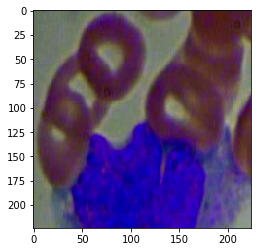

In [70]:
# get predictions
predictions = model.predict_classes(features_valid)[:, 0]
prediction_probabilities = model.predict(features_valid)[:, 0]

# extract validation images
_, valid_x, _, _ = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# get a random index
index = rng.choice(range(len(valid_x)))

# get the corresponding image
img = valid_x[index]

# get the corresponding probability
prob = (prediction_probabilities * 100).astype(int)[index]

# print this probability
print(prob, '% sure that it is WBC')

# show image
plt.imshow(img)

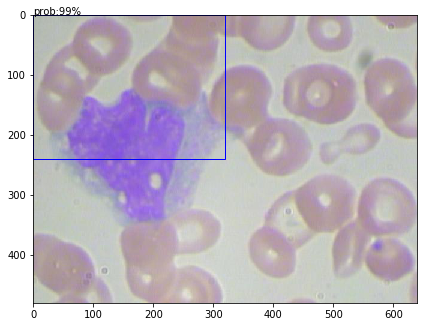

In [71]:
# extract index of patch
for i in range(X.shape[0]):
    if np.array_equal(X[i, :], img):
        break
        
# get the patch number
patch_num = (i % 5) + 1

# read the corresponding image
image = plt.imread('C:/Users/shash/Desktop/machine learning practice/blood_cell_detection/images/' + data.iloc[int(i/5)].filename)

# draw empty figure
fig = plt.figure()

# define axis
ax = fig.add_axes([0,0,1,1])

# plot image
ax.imshow(image)

# get minimum and maximum co-ordinates
xmin = eval('patch_' + str(patch_num) + '_xmin')
xmax = eval('patch_' + str(patch_num) + '_xmax')
ymin = eval('patch_' + str(patch_num) + '_ymin')
ymax = eval('patch_' + str(patch_num) + '_ymax')

# get width and height
width = xmax - xmin
height = ymax - ymin

# define a rectangular patch
rect = patches.Rectangle((xmin, ymin), width, height, edgecolor = 'b', facecolor = 'none')

# annotate the patch
ax.annotate(xy = (xmin, ymin), s = 'prob:' + str(prob) + '%')

# add the rectangular patch
ax.add_patch(rect)

#show figure
plt.show()